Training with Batch Size 16...
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.5742 - mae: 1.4059 - val_loss: 0.1904 - val_mae: 0.3632
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1717 - mae: 0.3329 - val_loss: 0.1222 - val_mae: 0.2911
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1361 - mae: 0.2987 - val_loss: 0.1194 - val_mae: 0.2889
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1172 - mae: 0.2791 - val_loss: 0.1099 - val_mae: 0.2791
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0972 - mae: 0.2491 - val_loss: 0.0966 - val_mae: 0.2579
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0954 - mae: 0.2481 - val_loss: 0.0882 - val_mae: 0.2481
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0837 - mae: 0.2331 - val_loss: 0.0825 - val_mae: 0.2390
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0795 - mae: 0.2260 - val_loss: 0.0800 - val_mae: 0.2309
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s

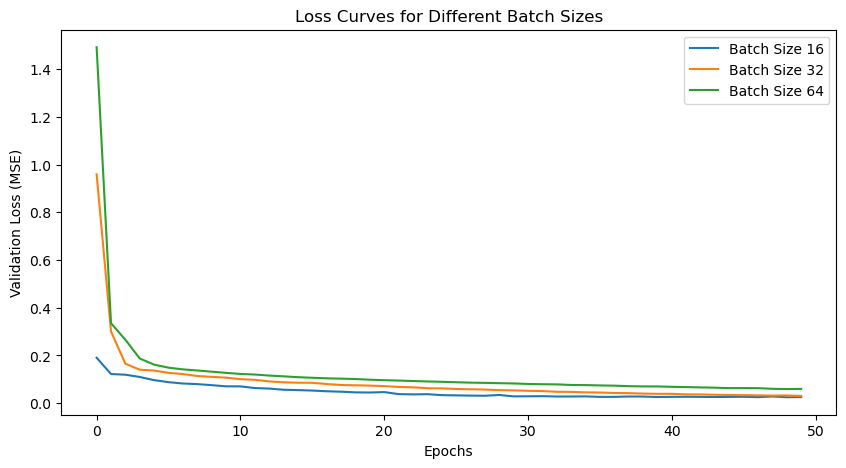

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import os

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Generate synthetic housing data
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = X @ np.random.rand(10) + np.random.randn(1000) * 0.1  # Linear relation with noise

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to build model
def build_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),  # Correct input layer
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# Train models with different batch sizes
batch_sizes = [16, 32, 64]
history_dict = {}

for batch_size in batch_sizes:
    print(f"Training with Batch Size {batch_size}...")
    model = build_model()
    history = model.fit(
        X_train, y_train,
        epochs=50,  # Reduce epochs to 50 to speed up training
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        verbose=1  # Show training progress
    )
    history_dict[batch_size] = history.history["val_loss"]

# Plot results
plt.figure(figsize=(10, 5))
for batch_size, loss in history_dict.items():
    plt.plot(loss, label=f"Batch Size {batch_size}")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss (MSE)")
plt.title("Loss Curves for Different Batch Sizes")
plt.legend()
plt.show()
